In [1]:
import pandas as pd

In [6]:
train = pd.read_csv("train.csv")
train.head(1)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence


In [3]:
FEATURES = train.drop(columns=["Heart Disease", "id"], axis=1)
TARGET = train["Heart Disease"]

**exploratory data analysis**

In [4]:
print(f"features Size: {FEATURES.shape}\n\ncolumns: {FEATURES.columns}.shape")

features Size: (630000, 13)

columns: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object').shape


In [5]:
numeric_features = FEATURES.select_dtypes(include=["int", "float"])
numeric_features.head(1)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7


**feature engineer**

**baseline**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
scaler = StandardScaler()
model = LogisticRegression(max_iter=10)

In [8]:
pipe = Pipeline([("scaler", scaler), ("stimator", model)])

baseline = cross_val_score(
    pipe,
    FEATURES,
    TARGET,
    scoring="roc_auc",
    cv=3,
)

baseline

array([0.95057805, 0.95107191, 0.94982967])

In [9]:
baseline_score = baseline.mean()
round(baseline_score, 4)

np.float64(0.9505)

Análise de dados

0. Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Examinando os dados

In [8]:
# Imprimindo as cinco primeiras linhas do conjunto de dados
train.info()
train.head()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


Como verificado -> NÃO HÁ VALORES NULOS

In [49]:
# Verificando se há nomes de colunas duplicados
bool(train.columns.duplicated().any())

False

Como verificado -> NÃO HÁ COLUNAS DUPLICADAS

2. Pré-processamento dos dados

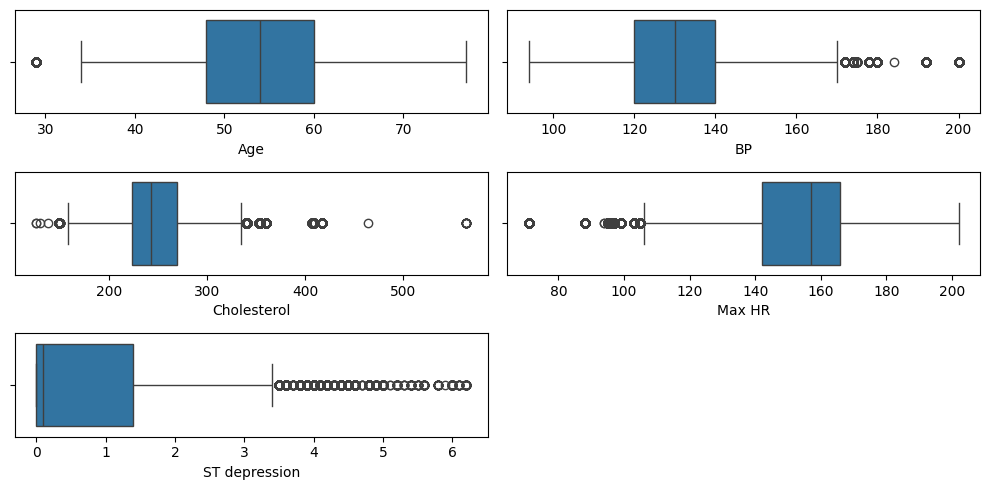

In [ ]:
# Identificando possíveis outliers
# Definindo o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 5))
# Plotando boxplot das colunas numéricas contínuas do conjunto de dados
cols = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]
for i in range(5):
    # Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(3, 2, i + 1)
    if i < 5:
        # Criando boxplot
        sns.boxplot(data=train, x=cols[i])

# Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()

In [47]:
# Explorando as estatísticas básicas das colunas numéricas contínuas no conjunto de dados
train[["Age", "BP", "Cholesterol", "Max HR", "ST depression"]].describe()

,Age,BP,Cholesterol,Max HR,ST depression
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,130.497433,245.011814,152.816763,0.716028
std,8.256301,14.975802,33.681581,19.112927,0.948472
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,223.000000,142.000000,0.000000
50%,54.000000,130.000000,243.000000,157.000000,0.100000
75%,60.000000,140.000000,269.000000,166.000000,1.400000
max,77.000000,200.000000,564.000000,202.000000,6.200000


3. Plotando os dados

<Axes: xlabel='Heart Disease', ylabel='Age'>

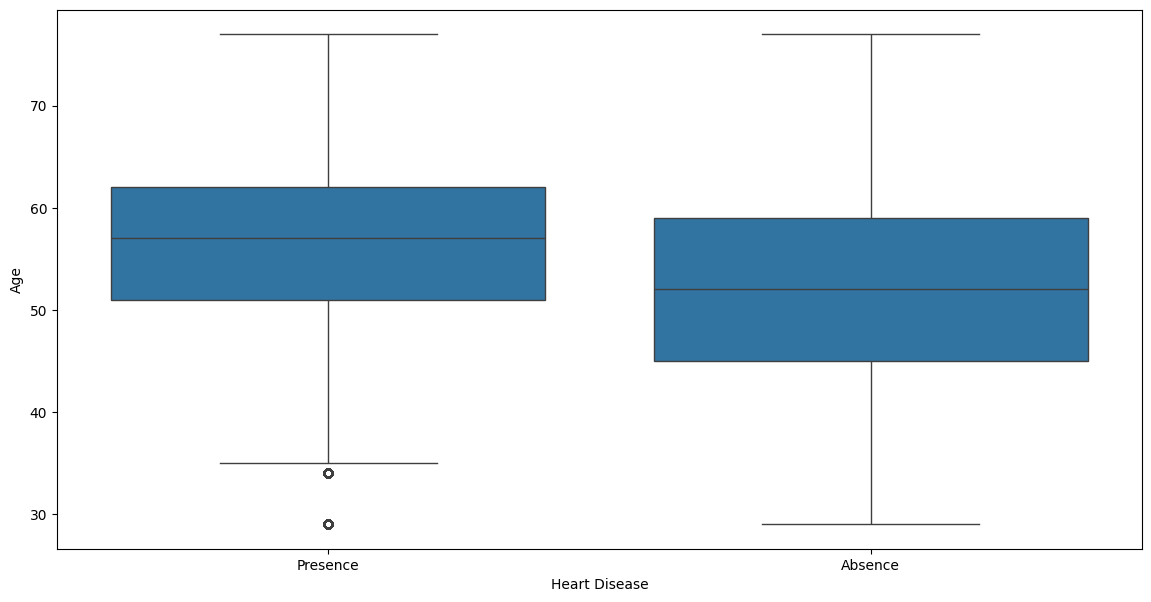

In [31]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Boxplot
sns.boxplot(x=train["Heart Disease"], y=train["Age"])

<Axes: xlabel='Sex', ylabel='percent'>

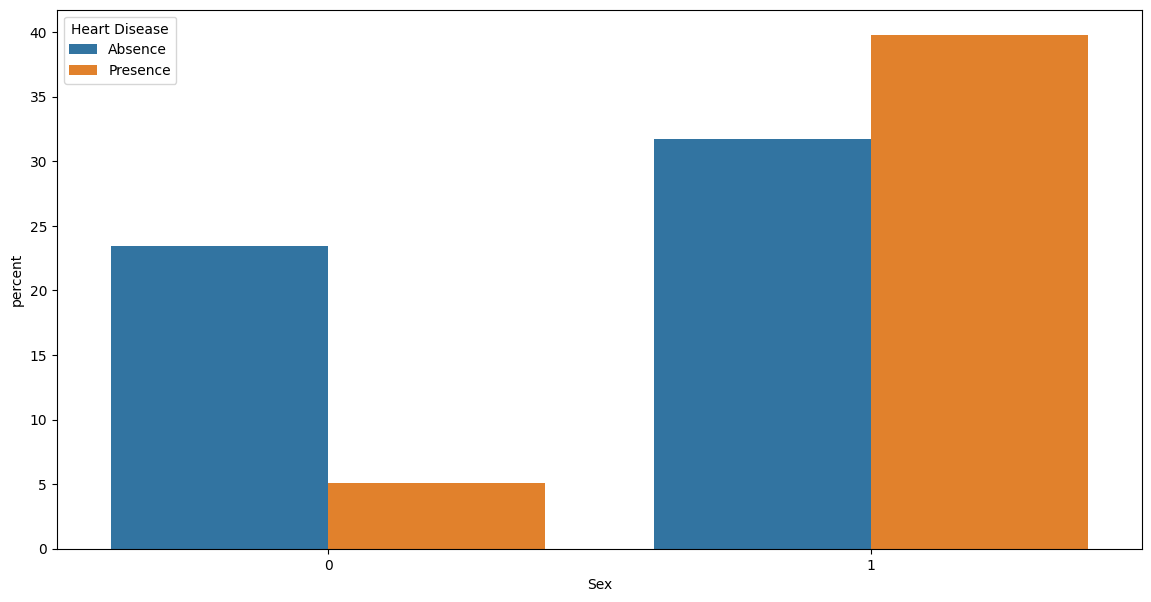

In [16]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(x=train["Sex"], hue="Heart Disease", data=train, stat="percent")

<Axes: xlabel='Chest pain type', ylabel='percent'>

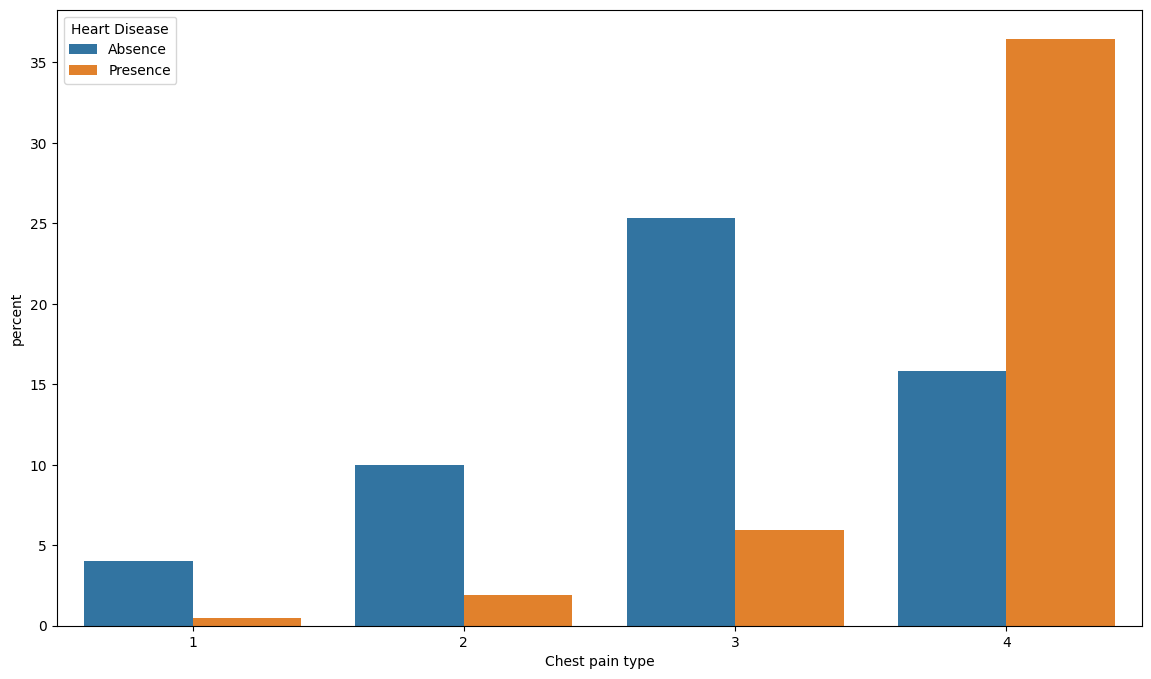

In [18]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 8))
# Gráfico de barras
sns.countplot(
    x=train["Chest pain type"], hue="Heart Disease", data=train, stat="percent"
)

<Axes: xlabel='Heart Disease', ylabel='BP'>

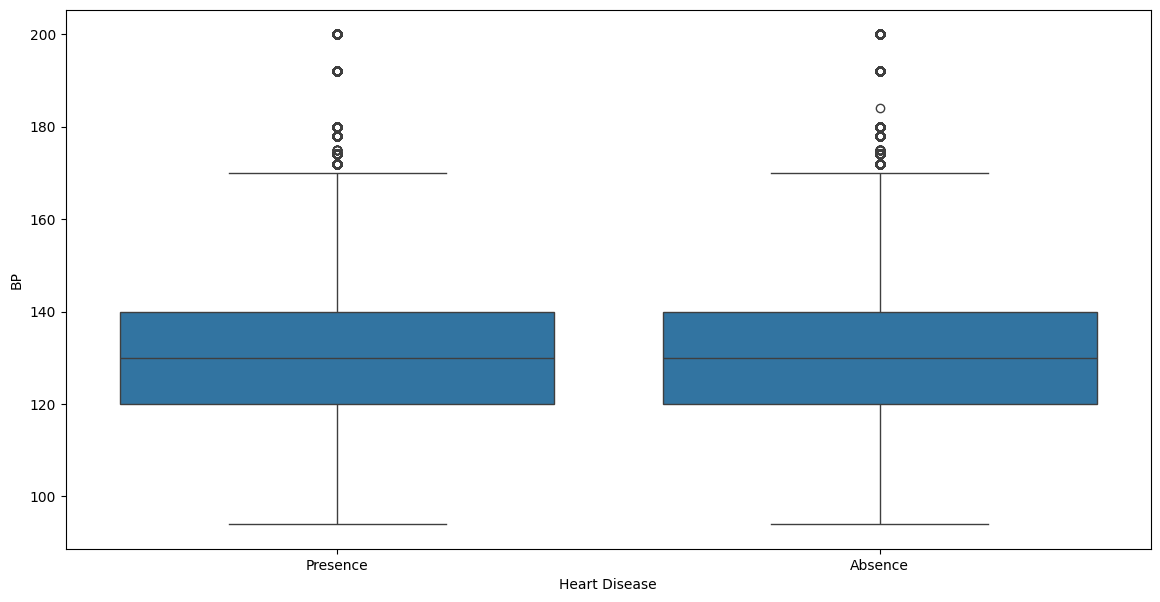

In [32]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Boxplot
sns.boxplot(x=train["Heart Disease"], y=train["BP"])

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

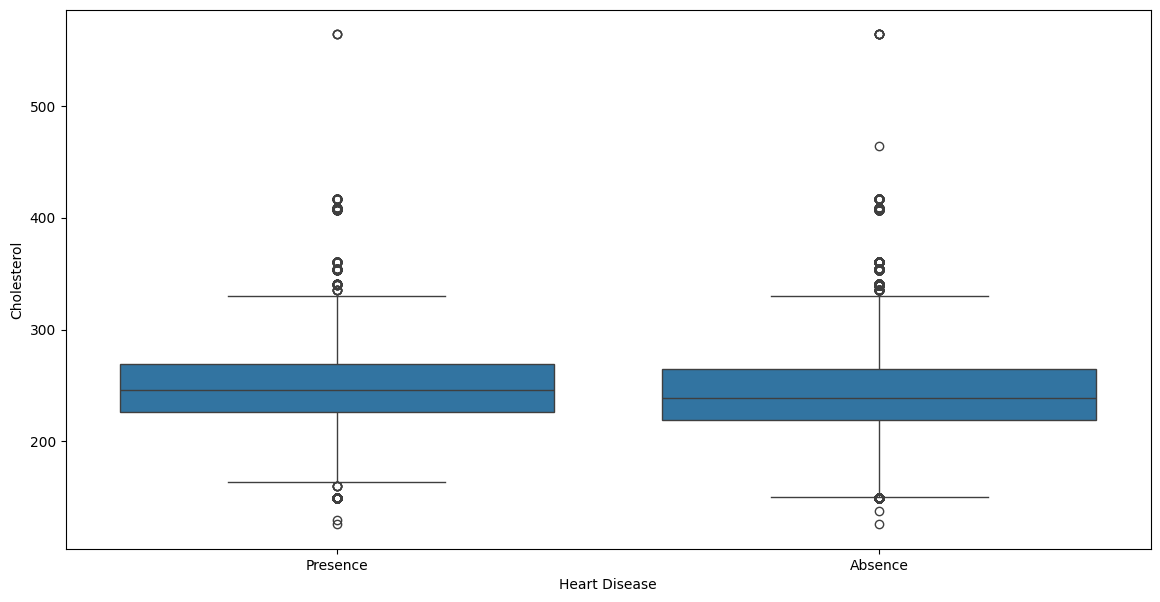

In [33]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Boxplot
sns.boxplot(x=train["Heart Disease"], y=train["Cholesterol"])

<Axes: xlabel='FBS over 120', ylabel='percent'>

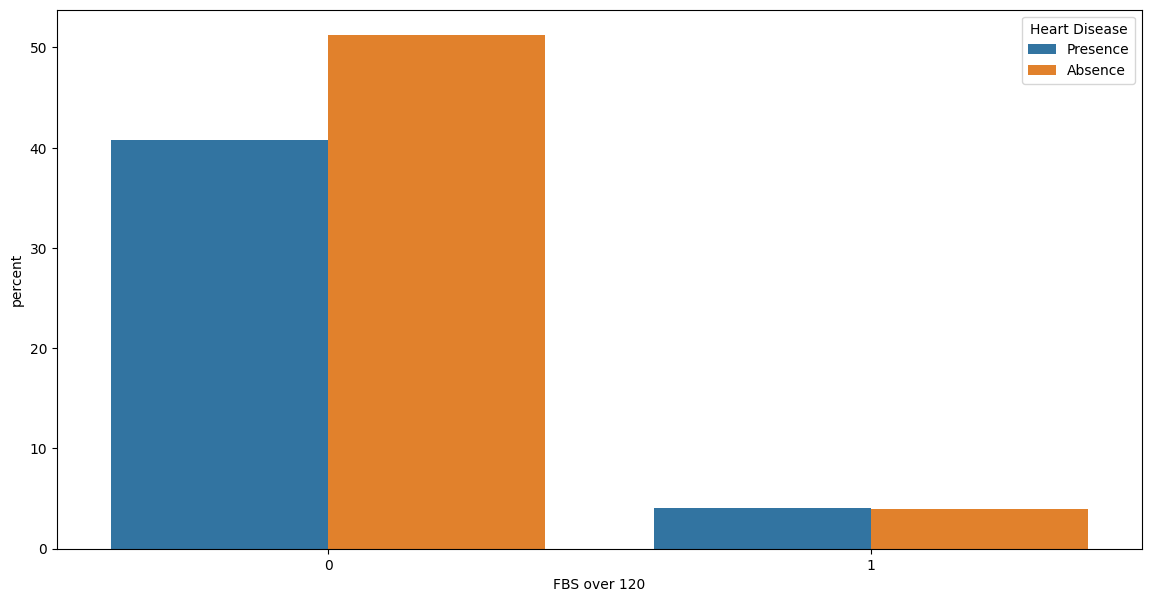

In [24]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(x=train["FBS over 120"], hue="Heart Disease", data=train, stat="percent")

<Axes: xlabel='EKG results', ylabel='percent'>

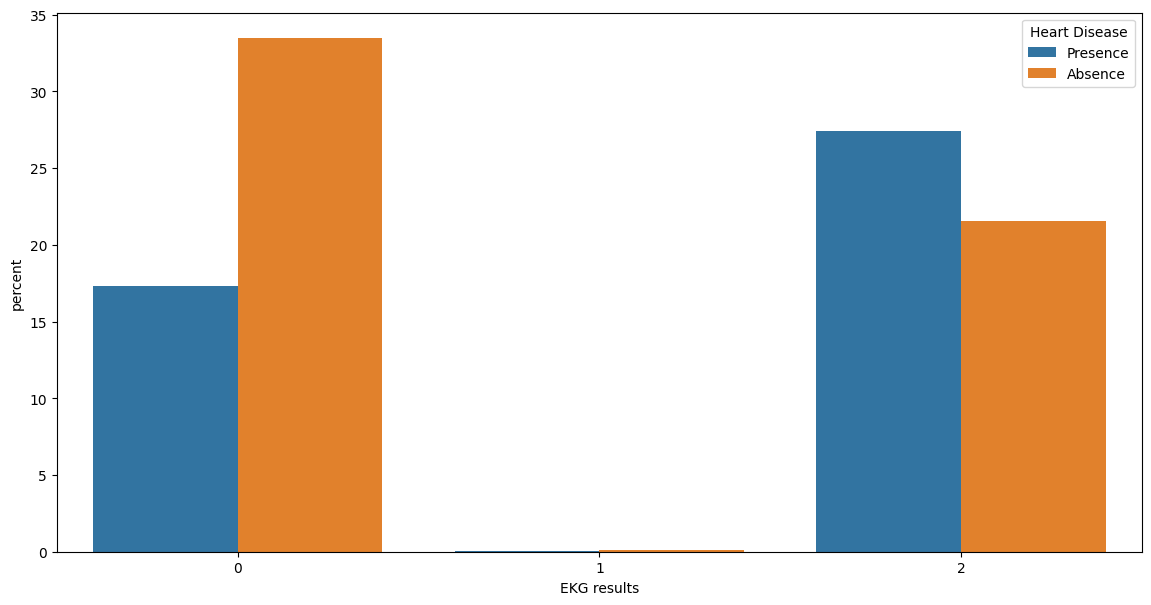

In [25]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(x=train["EKG results"], hue="Heart Disease", data=train, stat="percent")

<Axes: xlabel='Heart Disease', ylabel='Max HR'>

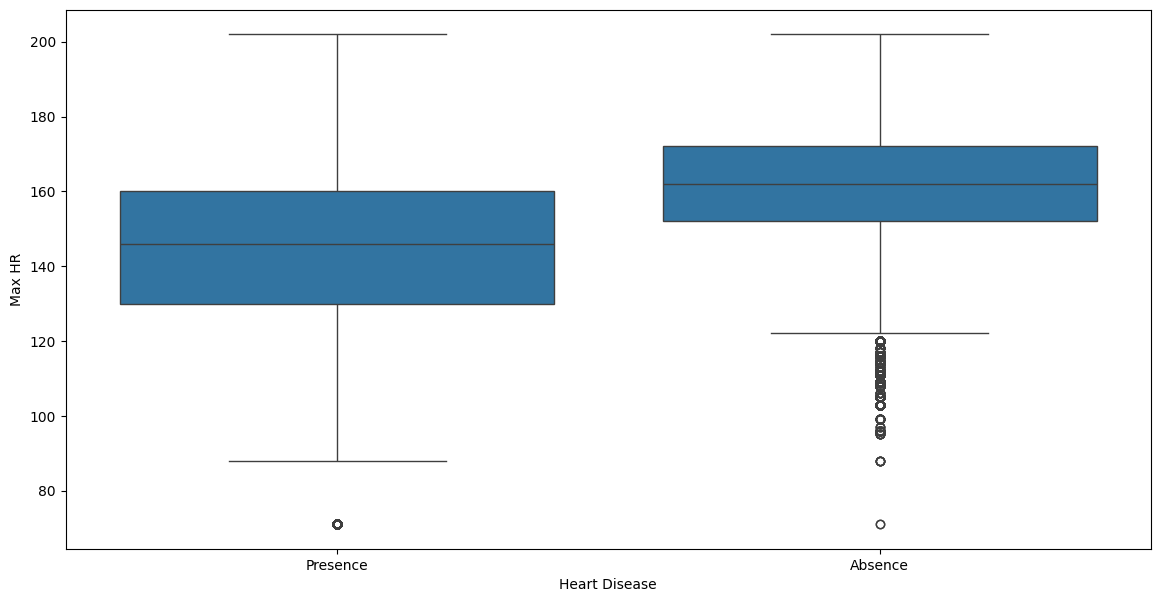

In [34]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Boxplot
sns.boxplot(x=train["Heart Disease"], y=train["Max HR"])

<Axes: xlabel='Exercise angina', ylabel='percent'>

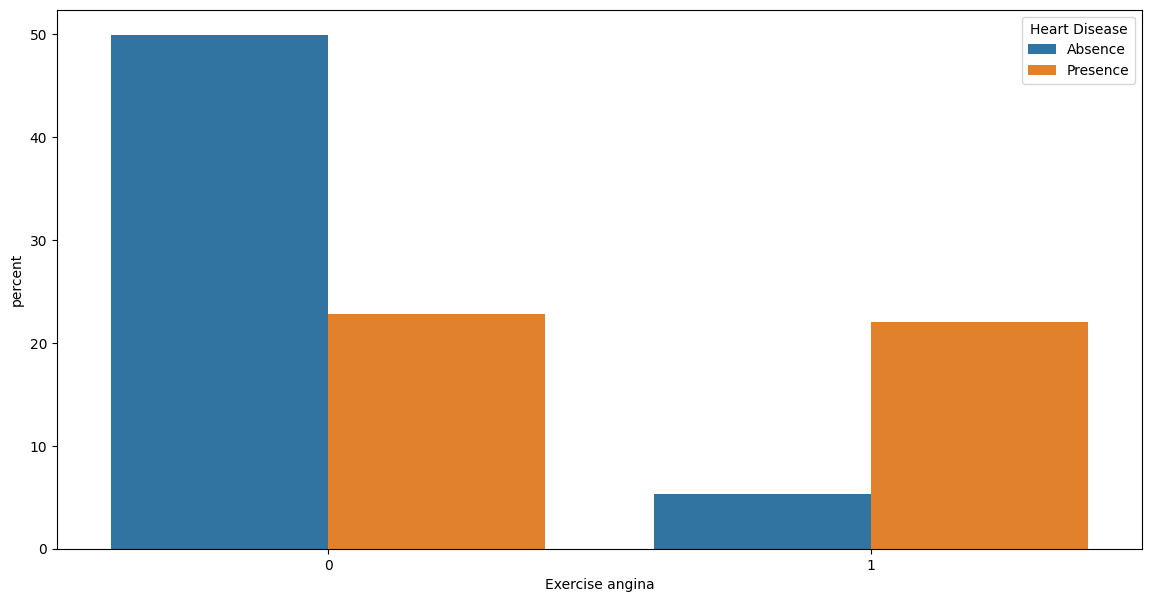

In [35]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(
    x=train["Exercise angina"], hue="Heart Disease", data=train, stat="percent"
)

<Axes: xlabel='Heart Disease', ylabel='ST depression'>

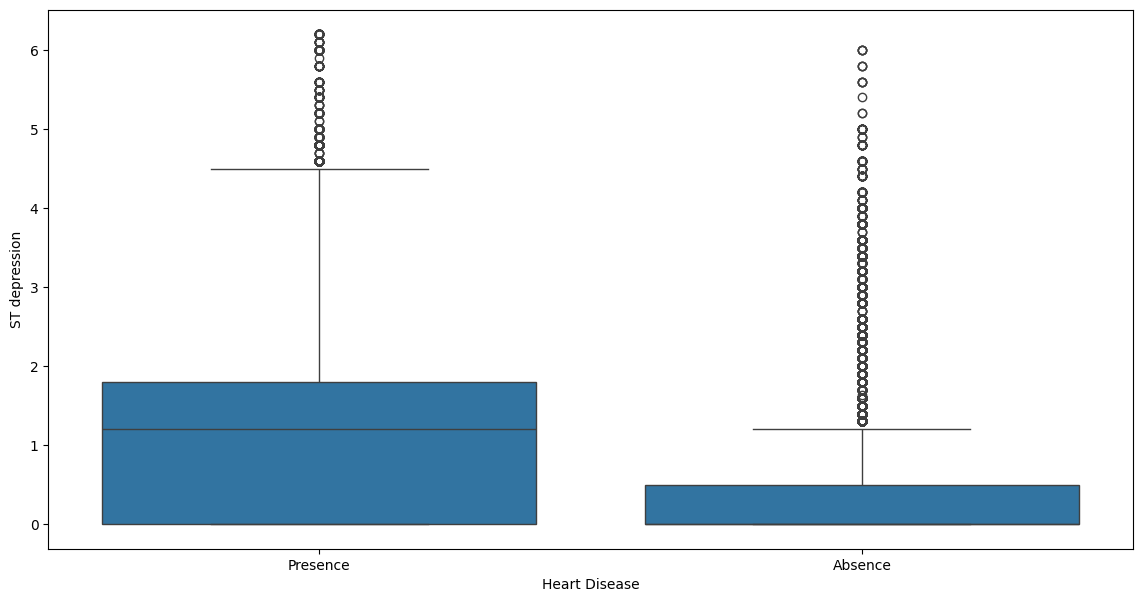

In [36]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Boxplot
sns.boxplot(x=train["Heart Disease"], y=train["ST depression"])

<Axes: xlabel='Slope of ST', ylabel='percent'>

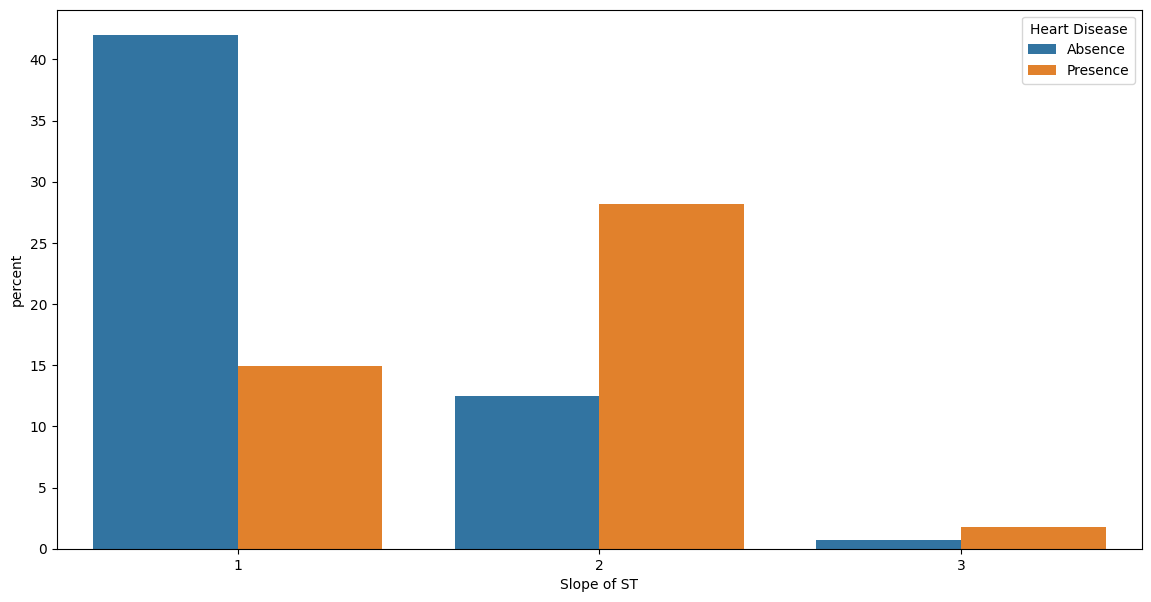

In [37]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(x=train["Slope of ST"], hue="Heart Disease", data=train, stat="percent")

<Axes: xlabel='Number of vessels fluro', ylabel='percent'>

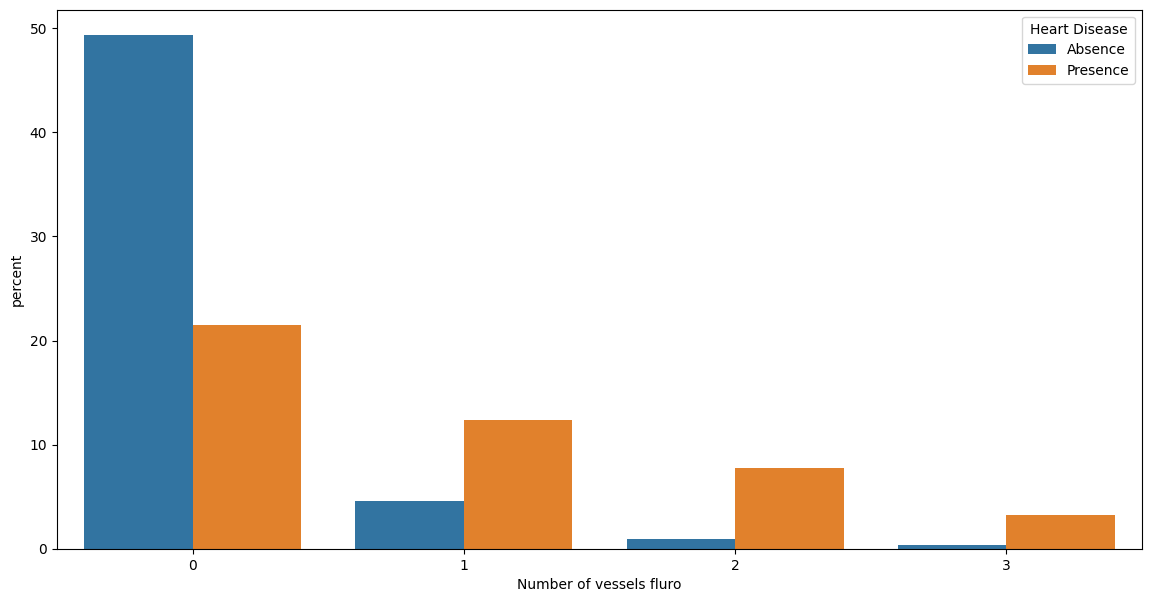

In [38]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(
    x=train["Number of vessels fluro"], hue="Heart Disease", data=train, stat="percent"
)

<Axes: xlabel='Thallium', ylabel='percent'>

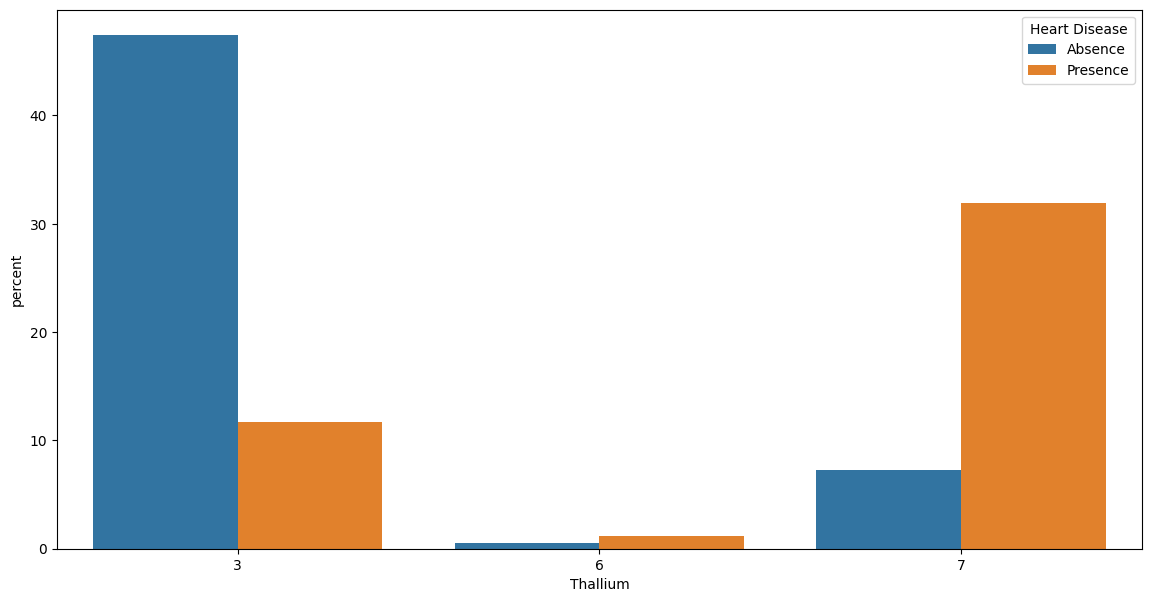

In [40]:
# Definindo altura e largura da figura
plt.figure(figsize=(14, 7))
# Gráfico de barras
sns.countplot(x=train["Thallium"], hue="Heart Disease", data=train, stat="percent")